In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import mytool as mt
import numpy as np

In [2]:
cut = [0.5, 0.5, 0.5]

mt.calc_feed_flows(3, 0, 1, cut)

array([1.5, 1. , 0.5])

In [3]:
#Case 1 no recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.336813209666015
3.2290895478933574
0.3912989227633823
0.042798319677244935


In [4]:
#Case 2 no recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872, 0.547009]

flow = mt.calc_feed_flows(5, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
25.786172491400155
3.3506205497807513
0.5953773288801222
0.1896982374740563
0.07813139246491452


In [5]:
#Case 1 recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v]


flow = mt.calc_feed_flows(3, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.444921316165956
3.204577968526467
0.3505007153075823


In [6]:
#Case 2 recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872]



flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.047225431064682
3.315665416640822
0.5240703271501721
0.11303882514432921


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)
/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


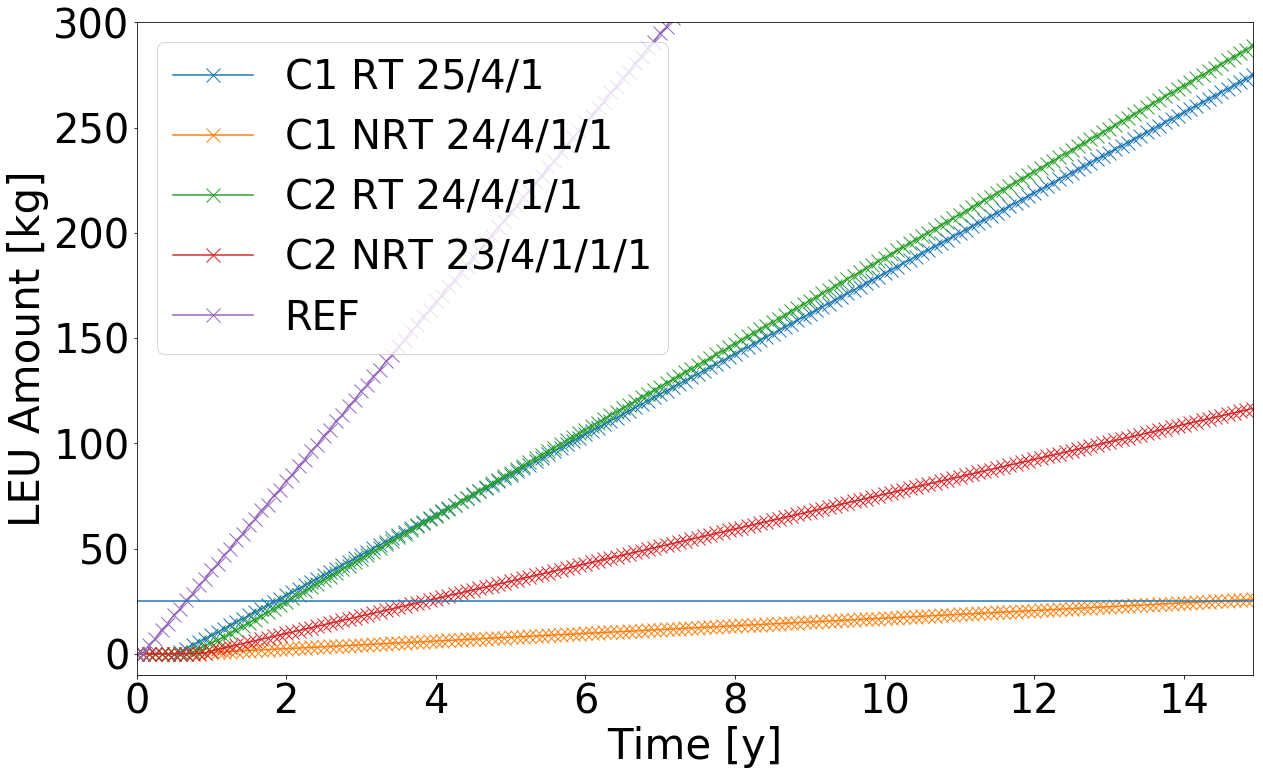

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

files = ['case_2_/cascade_case_2_S2_25_4_1.sqlite',
         'case_2_/cascade_case_2_no_rec_S3_24_4_1_1.sqlite',
         'case_3_/cascade_case_3_S3_24_4_1_1.sqlite',
         'case_3_/cascade_case_3_no_rec_S4_23_4_1_1_1.sqlite',
         'cascade_case_1.sqlite']
invs = ['storage_2',
        'storage_3',
        'storage_3',
        'storage_4',

        'storage']

c_names = ['C1 RT 25/4/1','C1 NRT 24/4/1/1','C2 RT 24/4/1/1','C2 NRT 23/4/1/1/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time [y]", "LEU Amount [kg]" )
plt.axhline(y=25)
plt.ylim((-10, 300))
#x = np.arange(0, 16, 1);
plt.savefig("HEU_prod.png")

In [8]:
plt_LEU_qty_case_2_x[4]

(            REF   Time [y]
 0      0.000000   0.000000
 1      0.000000   0.083333
 2      4.306458   0.166667
 3      7.092890   0.250000
 4     11.399348   0.333333
 5     14.185779   0.416667
 6     18.492237   0.500000
 7     21.278669   0.583333
 8     25.585127   0.666667
 9     28.371558   0.750000
 10    32.678017   0.833333
 11    35.464448   0.916667
 12    39.770906   1.000000
 13    42.557338   1.083333
 14    46.863796   1.166667
 15    49.650227   1.250000
 16    53.956685   1.333333
 17    56.743117   1.416667
 18    61.049575   1.500000
 19    63.836007   1.583333
 20    68.142465   1.666667
 21    70.928896   1.750000
 22    75.235354   1.833333
 23    78.021786   1.916667
 24    82.328244   2.000000
 25    85.114675   2.083333
 26    89.421134   2.166667
 27    92.207565   2.250000
 28    96.514023   2.333333
 29    99.300455   2.416667
 ..          ...        ...
 150  529.180290  12.500000
 151  531.966722  12.583333
 152  536.273180  12.666667
 153  539.059611  12